Длина цикла : первое r, при котором цикл появляется
  2 : r = 3.010000
  4 : r = 3.452000
  8 : r = 3.545000
 16 : r = 3.565000
 32 : r = 3.569000


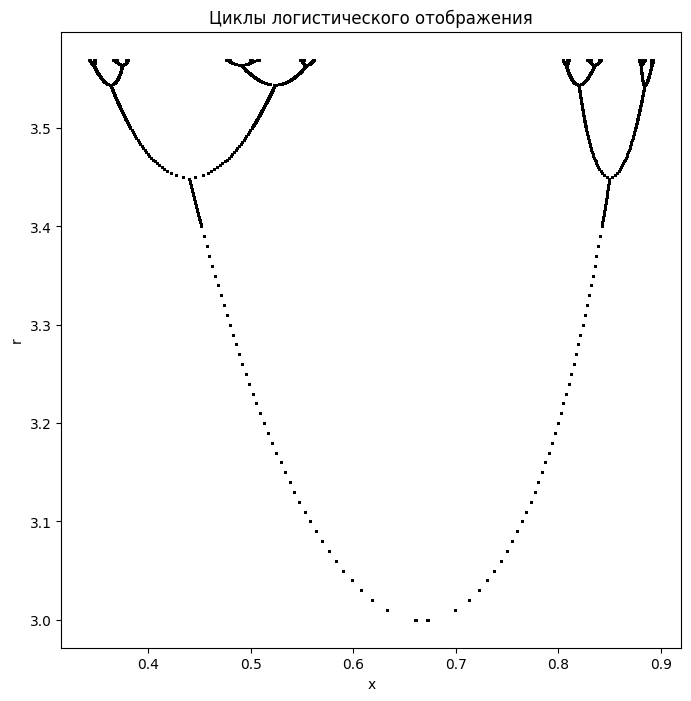

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, r):
    return r * x * (1 - x)

r_inf = 3.5699456
x0 = 0.5
burn = 1500
keep = 600

r_vals = []

r = 3.0
while r < 3.4:
    r_vals.append(r)
    r += 0.01

r = 3.4
while r < 3.5:
    r_vals.append(r)
    r += 0.002

r = 3.5
while r < r_inf:
    r_vals.append(r)
    r += 0.0005

rs = []
xs = []

first_r = {}

for r in r_vals:
    x = x0
    for _ in range(burn):
        x = f(x, r)

    traj = []
    for _ in range(keep):
        x = f(x, r)
        traj.append(x)
        xs.append(x)
        rs.append(r)

    unique_vals = np.unique(np.round(traj, 8))
    cycle_len = len(unique_vals)

    if cycle_len & (cycle_len - 1) == 0:
        if cycle_len not in first_r:
            first_r[cycle_len] = r

print("Длина цикла : первое r, при котором цикл появляется")
for cycle_len in sorted(first_r):
    print(f"{cycle_len:3d} : r = {first_r[cycle_len]:.6f}")

plt.figure(figsize=(8,8))
plt.scatter(xs, rs, s=0.3, color="black")
plt.xlabel("x")
plt.ylabel("r")
plt.title("Циклы логистического отображения")
#plt.xlim(0.0, 1.0)
#plt.ylim(3.5, r_inf)
plt.show()

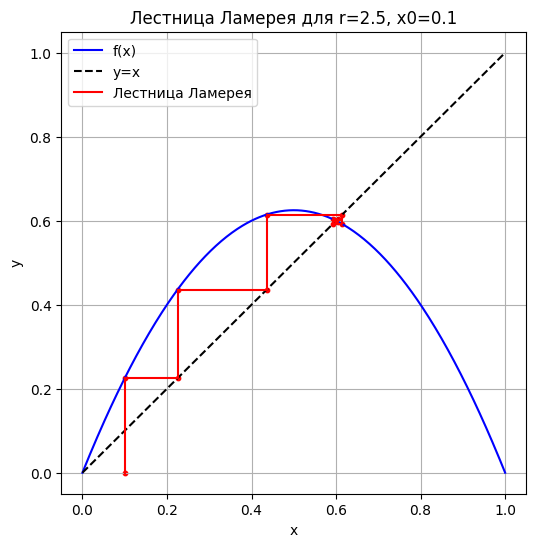

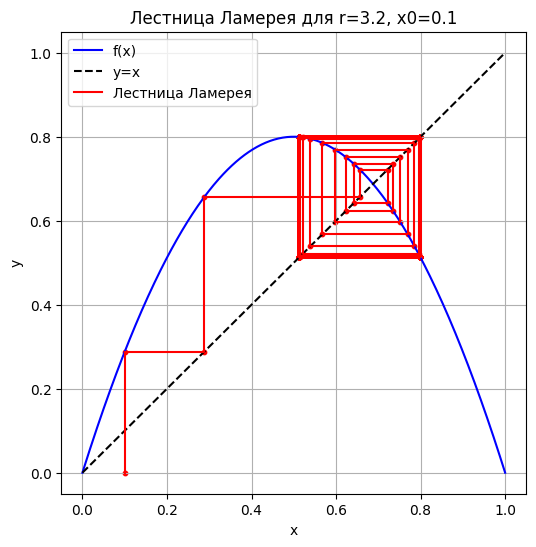

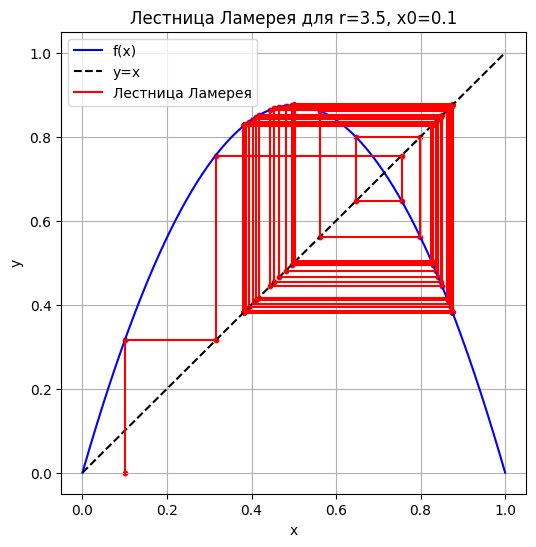

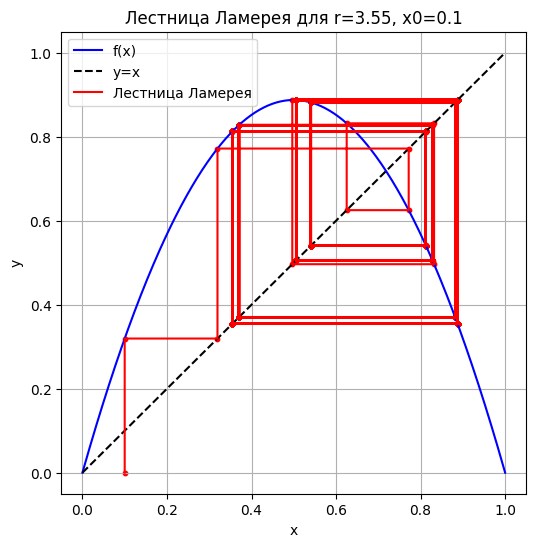

'\nЦикл порядка 1 - лестница образует последовательность ступенек,\nкоторые постепенно сходятся к одной точке\n\nДалее, образуется куча квадратов. Чем больше цикл, тем больше размер квадратов\n'

In [27]:
def lamerey_stairs(r, x0=0.1, n_iter=30):

    x = np.linspace(0, 1, 400)
    y = f(x, r)

    x_vals = [x0]
    y_vals = [0]

    x_curr = x0
    for _ in range(n_iter):
        y_next = f(x_curr, r)
        x_vals.append(x_curr)
        y_vals.append(y_next)

        x_vals.append(y_next)
        y_vals.append(y_next)

        x_curr = y_next

    plt.figure(figsize=(6,6))
    plt.plot(x, y, 'b', label='f(x)')
    plt.plot(x, x, 'k--', label='y=x')
    plt.plot(x_vals, y_vals, 'r', label='Лестница Ламерея')
    plt.scatter(x_vals, y_vals, color='red', s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Лестница Ламерея для r={r}, x0={x0}')
    plt.legend()
    plt.grid(True)
    plt.show()

lamerey_stairs(r=2.5, x0=0.1, n_iter=125)

lamerey_stairs(r=3.2, x0=0.1, n_iter=250)

lamerey_stairs(r=3.5, x0=0.1, n_iter=500)

lamerey_stairs(r=3.55, x0=0.1, n_iter=1000)

"""
Цикл порядка 1 - лестница образует последовательность ступенек,
которые постепенно сходятся к одной точке

Далее, образуется куча квадратов. Чем больше цикл, тем больше размер квадратов
"""

Длина цикла : первое r, при котором цикл появляется
  1 : r = 0.000000
  2 : r = 1.834000
  3 : r = 2.493000
  4 : r = 1.846000
  5 : r = 2.427500
  6 : r = 2.200000
  7 : r = 2.399000
  8 : r = 2.272000
  9 : r = 2.196000
 10 : r = 2.321500
 11 : r = 2.383000
 12 : r = 2.303500
 14 : r = 2.328000
 15 : r = 2.507500
 16 : r = 2.289500
 20 : r = 2.322000
 24 : r = 2.343000
 25 : r = 2.292500
 32 : r = 2.293000
 40 : r = 1.836000
 64 : r = 2.293500
112 : r = 2.430500
388 : r = 2.272500
513 : r = 1.838000
521 : r = 2.289000
536 : r = 2.411000
587 : r = 2.273500
592 : r = 2.309000
595 : r = 2.509000
599 : r = 2.432500
600 : r = 0.500000


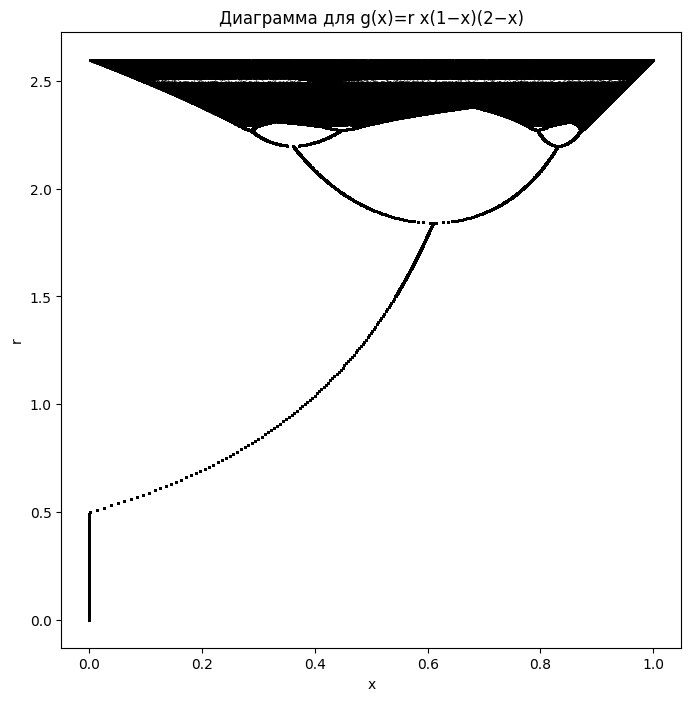

In [26]:
def g(x, r):
    return r * x * (1 - x) * (2 - x)

r_max = 3 * np.sqrt(3) / 2

x0 = 0.5
burn = 1500
keep = 600

r_vals = []

r = 0.0
while r < 1.5:
    r_vals.append(r)
    r += 0.01

r = 1.5
while r < 2.2:
    r_vals.append(r)
    r += 0.002

r = 2.2
while r < r_max:
    r_vals.append(r)
    r += 0.0005

xs = []
rs = []
first_r = {}

for r in r_vals:
    x = x0

    for _ in range(burn):
        x = g(x, r)

    traj = []
    for _ in range(keep):
        x = g(x, r)
        traj.append(x)
        xs.append(x)
        rs.append(r)

    unique_vals = np.unique(np.round(traj, 8))
    cycle_len = len(unique_vals)

    if cycle_len not in first_r:
        first_r[cycle_len] = r


print("Длина цикла : первое r, при котором цикл появляется")
for cycle_len in sorted(first_r):
    print(f"{cycle_len:3d} : r = {first_r[cycle_len]:.6f}")


plt.figure(figsize=(8,8))
plt.scatter(xs, rs, s=0.3, color="black")
plt.xlabel("x")
plt.ylabel("r")
plt.title("Диаграмма для g(x)=r x(1−x)(2−x)")
plt.show()